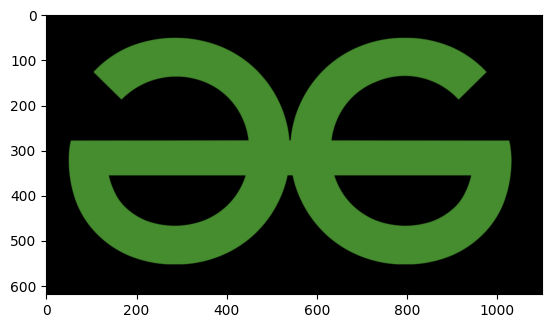

In [37]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
image = cv2.imread('gfgblack.png')
plt.imshow(image)
plt.show()

In [38]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

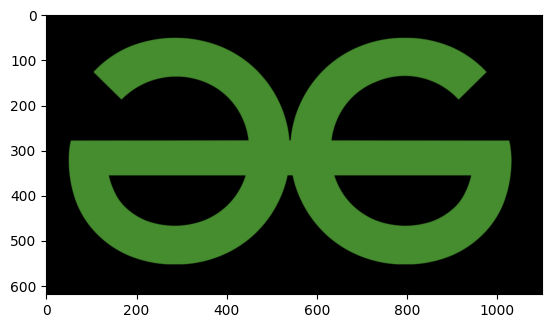

In [39]:
plt.imshow(image)
plt.show()

In [40]:
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [41]:
import numpy as np
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

In [42]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

In [43]:
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

In [44]:
markers = cv2.watershed(image, markers)
image[markers == -1] = [0, 0, 255]

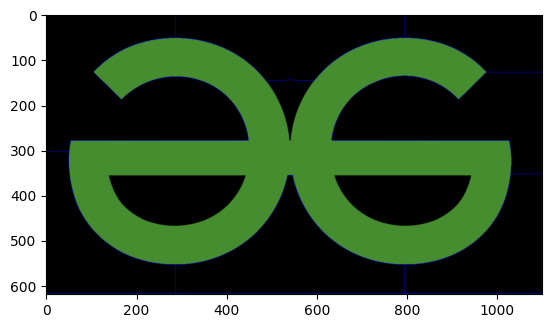

In [45]:
plt.imshow(image)
plt.show()